# Homework Rakamin Trial Class Batch 32 - Mini Case
Author: NABILAH SHARFINA

# Connect to Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Load Dataset
> Dataset ini menggambarkan perilaku dan profil pelanggan di sebuah bank yang menyediakan program pinjaman untuk pembelian properti. Bayangkan kamu sedang bekerja di sebuah bank yang menyediakan layanan pinjaman uang untuk pembelian properti. Pelanggan-pelanggan program ini merupakan nasabah di bank tersebut. Kamu diberikan data yang berisi semua data pribadi nasabah dan sekaligus rekam jejak kreditnya dalam satu periode. Saat ini kamu diminta untuk menganalisis bagaimana perilaku pelanggan yang mengajukan pinjaman ke bank tersebut

In [3]:
df = pd.read_csv("/content/drive/MyDrive/RAKAMIN ACADEMY/FREE CLASS/BATCH 32/loan_customer.csv")
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

## Section 1: Data Preprocessing
> Sebelum memulai pengolahan data, kamu harus membersihkan data terlebih dahulu.

### Handling missing values

In [5]:
# Before drop missing values
print("Before drop missing values:")
print(df.isna().sum())

# Drop missing values
df = df.dropna()

# After drop missing values
print("\nAfter drop missing values:")
print(df.isna().sum())

Before drop missing values:
loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

After drop missing values:
loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64


> Penanganan missing values pada dataset **Loan Customer** menggunakan metode `dropna()`. Hasilnya adalah semua variabel yang memiliki nilai kosong akan dihapus.

### Handling duplicated data

In [6]:
# Before drop duplicated values
print("Before drop duplicated values\t: ", (df.duplicated().sum()))

# Drop duplicated values
df = df.drop_duplicates()

# After drop duplicated values
print("After drop duplicated values\t: ", (df.duplicated().sum()))

Before drop duplicated values	:  0
After drop duplicated values	:  0


### Handling Outlier

In [7]:
df.describe(include='all')

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
count,52,52,5.200000e+01,52,52,52,52,52,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52,52,52
unique,52,52,NaN,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2
top,LP001028,1987-11-16,NaN,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,NaN,no,house,APPROVE
freq,1,1,NaN,42,32,29,37,42,NaN,NaN,NaN,NaN,NaN,NaN,30,21,39
mean,NaN,NaN,5.195481e+11,NaN,NaN,NaN,NaN,NaN,5002.076923,1237.923077,139153.846154,342.000000,28.500000,0.884615,NaN,NaN,NaN
std,NaN,NaN,2.250248e+11,NaN,NaN,NaN,NaN,NaN,3241.258512,1685.352606,66797.729389,63.697816,5.308151,0.322603,NaN,NaN,NaN
min,NaN,NaN,6.281124e+10,NaN,NaN,NaN,NaN,NaN,1025.000000,0.000000,35000.000000,84.000000,7.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,6.281125e+11,NaN,NaN,NaN,NaN,NaN,3053.500000,0.000000,103000.000000,360.000000,30.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,6.281255e+11,NaN,NaN,NaN,NaN,NaN,4014.000000,230.500000,122000.000000,360.000000,30.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,6.285232e+11,NaN,NaN,NaN,NaN,NaN,5966.250000,2065.500000,173500.000000,360.000000,30.000000,1.000000,NaN,NaN,NaN


In [8]:
print(f"Jumlah baris sebelum menyaring outlier: {len(df)}")

for col in ["applicant_income", "coapplicant_income", "loan_amount", "loan_term_month", "loan_term_year"]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f"Jumlah baris setelah menyaring outlier: {len(df)}")

Jumlah baris sebelum menyaring outlier: 52
Jumlah baris setelah menyaring outlier: 39


### Feature Encoding

In [9]:
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 26 to 613
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             39 non-null     object 
 1   birth_date          39 non-null     object 
 2   phone_number        39 non-null     float64
 3   gender              39 non-null     object 
 4   married             39 non-null     object 
 5   dependents          39 non-null     object 
 6   education           39 non-null     object 
 7   self_employed       39 non-null     object 
 8   applicant_income    39 non-null     float64
 9   coapplicant_income  39 non-null     float64
 10  loan_amount         39 non-null     int64  
 11  loan_term_month     39 non-null     int64  
 12  loan_term_year      39 non-null     int64  
 13  credit_history      39 non-null     float64
 14  has_credit_card     39 non-null     object 
 15  property_type       39 non-null     object 
 16  loan_sta

In [12]:
# lable encoding untuk kolom gender, married, education, has_credit_card, loan_status
mapping_gender = {
    "Female" : 0,
    "Male" : 1
}

mapping_married = {
    "No" : 0,
    "Yes" : 1
}

mapping_education = {
    "Not Graduate" : 0,
    "Graduate" : 1
}

mapping_has_credit_card = {
    "no" : 0,
    "yes" : 1
}

mapping_loan_status = {
    "REJECT" : 0,
    "APPROVE" : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

# one hot encoding untuk kolom property_type
onehot_property_type = pd.get_dummies(df["property_type"], prefix="property")
df = df.join(onehot_property_type)

# drop kolom outdated
# df=df.drop(columns=["property_type"])

# menampilkan hasil encoded
df.sample()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,property_apartment,property_house,property_studio
216,LP001720,1980-02-17,6.281330e+11,1,1,3+,0,No,3850.0,983.0,100000,360,30,1.0,0,apartment,1,1,0,0


In [13]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
nums = df.select_dtypes(include='number').columns.tolist()
cats = df.select_dtypes(include='object').columns.tolist()

from pprint import pprint
print("Numerical features:")
pprint(nums, compact=True)
print("\nCategorical features:")
pprint(cats, compact=True)

Numerical features:
['phone_number', 'gender', 'married', 'education', 'applicant_income',
 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year',
 'credit_history', 'has_credit_card', 'loan_status', 'property_apartment',
 'property_house', 'property_studio']

Categorical features:
['loan_id', 'birth_date', 'dependents', 'self_employed', 'property_type']


In [11]:
# for col in cats:
#   print(f'Value counts of column {col}')
#   print(df[col].value_counts())
#   print('---'*10, '\n')

<ipython-input-14-25323513a3f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=plt.cm.Blues, cbar=False)


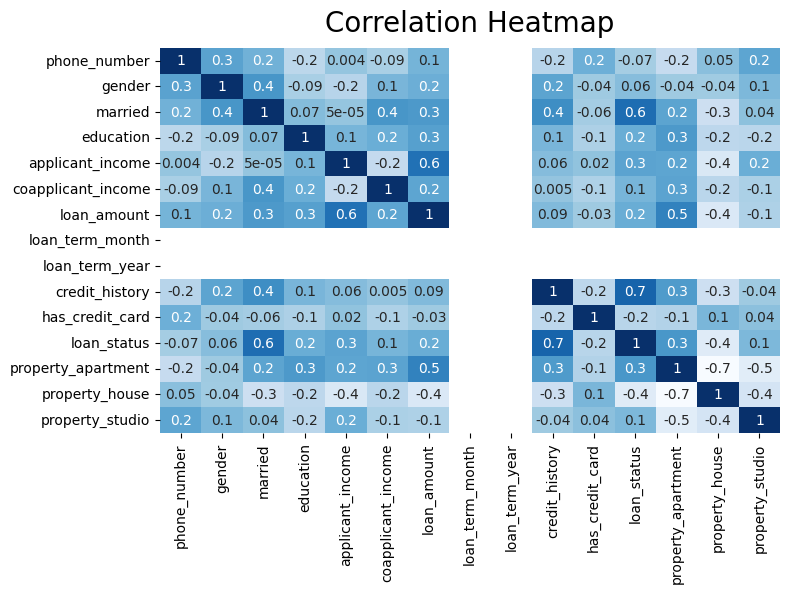

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
heatmap = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=plt.cm.Blues, cbar=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

# Business Insight

## Section 2: Analisis minat pelanggan berdasarkan pada tipe properti
Langkah-langkah:
1. Buatlah tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti.
2. Buatlah visualisasi untuk data pada tahap sebelumnya. (Boleh menggunakan tools lain, misalnya ms. excel)
3. Tulislah interpretasi-mu

In [15]:
section2 = df.groupby(['gender','property_type']).sum()[['loan_amount']]
section2

<ipython-input-15-500a77cf66e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  section2 = df.groupby(['gender','property_type']).sum()[['loan_amount']]


loan_amount
gender property_type             
0      apartment           496000
       house               235000
       studio              138000
1      apartment          2101000
       house              1042000
       studio              768000

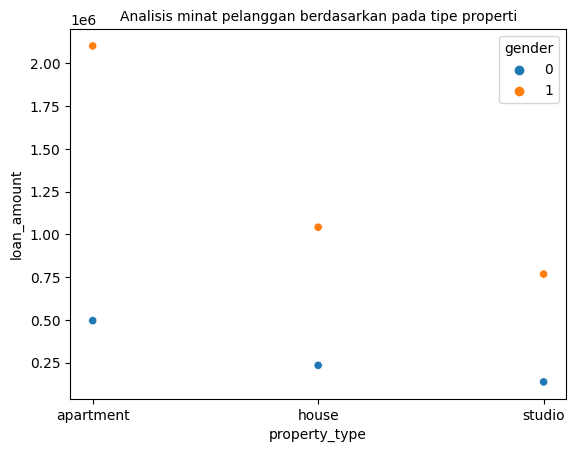

In [16]:
sns.scatterplot(data=section2, x='property_type', y='loan_amount', hue='gender')
plt.title('Analisis minat pelanggan berdasarkan pada tipe properti', size=10)
plt.show()

* Minat perempuan dalam meminjam uang untuk pembelian property lebih besar daripada laki-laki.
* Sebagian besar perempuan meminjam uang pada bank untuk membeli Apartement.
* Sebagian laki-laki meminjam uang pada bank untuk membeli Apartement.

In [ ]:
# Buat tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti
# 0 = Female dan 1 = Male
df.groupby(["property_type","gender"])["loan_id"].count().reset_index()

# Buat visualisasi untuk data pada tahap sebelumnya
#Untuk tipe properti = studio
df_groupstudio=df[df["property_type"]=="studio"]

plt.subplot(2, 3, 1)
sns.countplot(df_groupstudio["gender"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk tipe properti = apartemen
df_groupapartment=df[df["property_type"]=="apartment"]

plt.subplot(2, 3, 1)
sns.countplot(df_groupapartment["gender"], color="purple", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk tipe properti = house
df_grouphouse=df[df["property_type"]=="house"]

plt.subplot(2, 3, 1)
sns.countplot(df_grouphouse["gender"], color="yellow", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

# Tulis interpretasi
# - Nasabah bank yang memiliki tipe properti apartment dan rumah cenderung lebih banyak mengajukan pinjaman membeli properti
# - Jenis kelamin nasabah bank laki-laki cenderung lebih banyak mengajukan pinjaman membeli properti untuk semua profile tipe properti yang dimiliki

## Section 3: Analisis pengaruh status perkawinan terhadap jangka waktu meminjam
Langkah-langkah:
1. Buatlah tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun).
2. Buatlah visualisasi untuk data pada tahap sebelumnya. (Boleh menggunakan tools lain, misalnya ms. excel)
3. Tulislah interpretasi-mu

In [17]:
section3 = df.groupby('married').count()[['loan_term_year']]
section3

,loan_term_year
married,
0,16
1,23


<Axes: xlabel='married'>

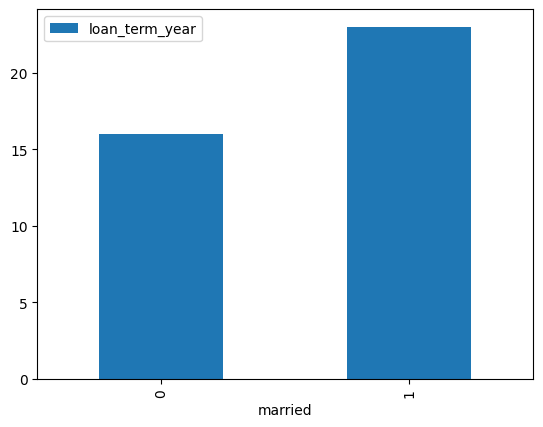

In [18]:
df.groupby('married').count()[['loan_term_year']].plot(kind = 'bar')

* Nasabah yang sudah menikah memiliki minat peminjaman uang ke bank untuk pembelian property daripada nasabah yang belum menikah.

In [ ]:
#Buat tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun)
# 0 = tidak menikah dan 1 = menikah
print(df.groupby(["loan_term_year", "married"])["loan_id"].count())

#Buat visualisasi untuk data pada tahap sebelumnya
#Untuk loan term = 7 tahun
df_group7=df[df["loan_term_year"]==7]

plt.subplot(2, 3, 1)
sns.countplot(df_group7["married"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 15 tahun
df_group15=df[df["loan_term_year"]==15]

plt.subplot(2, 3, 1)
sns.countplot(df_group15["married"], color="purple", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 25 tahun
df_group25=df[df["loan_term_year"]==25]

plt.subplot(2, 3, 1)
sns.countplot(df_group25["married"], color="yellow", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Untuk loan term = 30 tahun
df_group30=df[df["loan_term_year"]==30]

plt.subplot(2, 3, 1)
sns.countplot(df_group30["married"], color="orange", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

#Tulis interpretasi
# - Nasabah bank yang mengajukan jangka waktu meminjam 30 tahun cenderung dominan
# - Nasabah bank yang memiliki status pernikahan nikah cenderung lebih banyak pada jangka waktu meminjam 30 tahun

# Kesimpulan
Buatlah kesimpulan dari hasil analisismu di section 2 dan 3. Kira-kira bagaimana karakteristik nasabah yang mengajukan pinjaman pada bank